In [1]:
!pip install pyvista vtk pyvistaqt PyQt5

# Visualize by TAWSS values

/usr/local/lib/python3.11/dist-packages/pyvista/plotting/utilities/xvfb.py:48: PyVistaDeprecationWarning: This function is deprecated and will be removed in future version of PyVista. Use vtk-osmesa instead.
  warnings.warn(


Point arrays: ['TAWSS']
Saved:
 - colored_point_cloud_full.png (full range)
 - colored_point_cloud_clipped.png (clipped at 95th percentile)


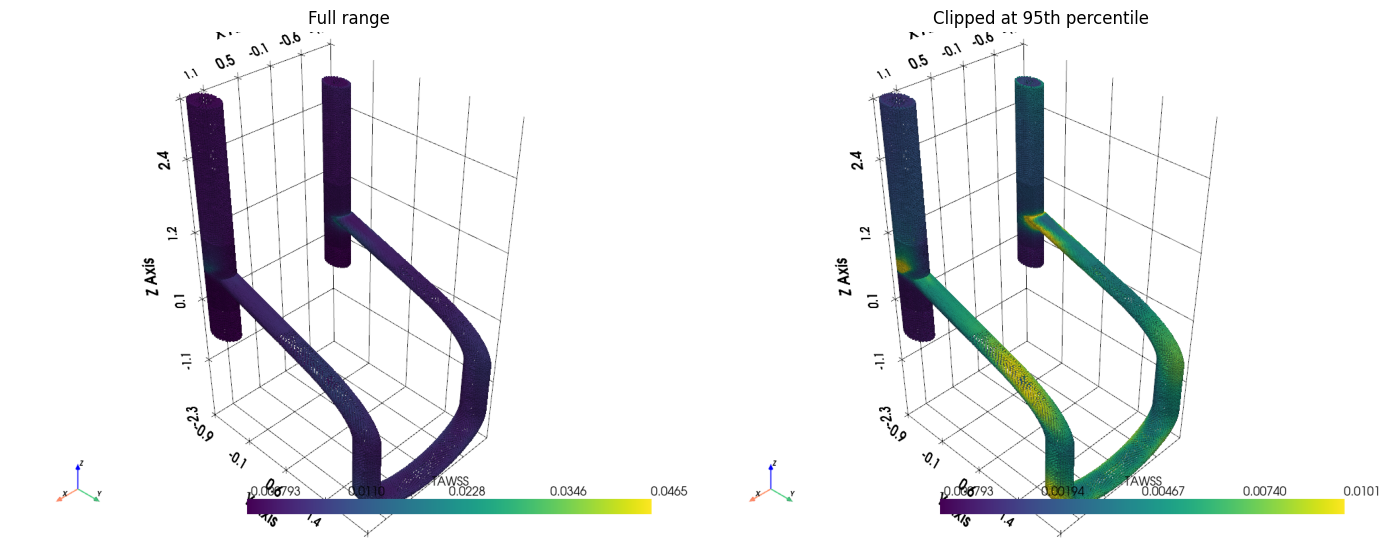

In [2]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

pv.set_jupyter_backend(None)
pv.start_xvfb()

path = "demo_pred_nodes_00 (1).vtk"
mesh = pv.read(path)

# Choose which point-data array to color by:
PREFERRED = None  # e.g. "TAWSS", "WSS", "pressure"
point_arrays = list(mesh.point_data.keys())
print(f"Point arrays: {point_arrays}")
scalars_name = point_arrays[0]

# If vector-valued, color by magnitude
vals = mesh.point_data[scalars_name]
if vals.ndim == 2 and vals.shape[1] > 1:
    vals = np.linalg.norm(vals, axis=1)
    mesh.point_data[scalars_name] = vals

# First plot: full range
p1 = pv.Plotter(off_screen=True)
p1.add_mesh(
    mesh, scalars=scalars_name,
    render_points_as_spheres=True, point_size=4.0,
    clim=[np.min(vals), np.max(vals)],  # full min->max
    show_scalar_bar=True,
)
p1.add_axes(); p1.show_grid(); p1.camera_position = "iso"
png_full = "colored_point_cloud_full.png"
p1.show(screenshot=png_full)

# Second plot: clipped to 95th percentile max
common_max = np.percentile(vals, 95)  # adjust percentile if you like
p2 = pv.Plotter(off_screen=True)
p2.add_mesh(
    mesh, scalars=scalars_name,
    render_points_as_spheres=True, point_size=4.0,
    clim=[np.min(vals), common_max],  # min->95th percentile
    show_scalar_bar=True,
)
p2.add_axes(); p2.show_grid(); p2.camera_position = "iso"
png_clipped = "colored_point_cloud_clipped.png"
p2.show(screenshot=png_clipped)

print(f"Saved:\n - {png_full} (full range)\n - {png_clipped} (clipped at 95th percentile)")

# Combine side-by-side preview in matplotlib
img1 = plt.imread(png_full)
img2 = plt.imread(png_clipped)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].imshow(img1); axs[0].axis("off"); axs[0].set_title("Full range")
axs[1].imshow(img2); axs[1].axis("off"); axs[1].set_title("Clipped at 95th percentile")
plt.tight_layout()
plt.savefig("comparison_side_by_side.png", dpi=150)
plt.show()
